In [1]:
# Version 4 matches with Preso
# Initial Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "./input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))


['sign_mnist_train.csv', 'New_Pictures', 'sign_mnist_test.csv', '.ipynb_checkpoints', 'Y.npy', 'X.npy']


In [2]:
# Initial imports
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import keras


In [3]:
# Note before running: 
# Load the 4 datasets (X, Y, sign_mnist_train and sign_mnist_test) into 'input' folder in same location as this file.
# Then create a subfolder 'New_Pictures', under 'input' folder, and load the 5 additional pictures into the subfolder.

# Part 1 - Digits ASL Hand Signals (0 - 9)

In [4]:
# load Digits data set
x = np.load('./input/X.npy')
y = np.load('./input/Y.npy')

In [5]:
# The mapping for the digits dataset (the digits are not in chronological order)
# x_9 = x_l[:204]; x_0 = x_l[204:409]; x_7 = x_l[409:615]; x_6 = x_l[615:822]; x_1 = x_l[822:1028]; 
# x_8 = x_l[1028:1236]; x_4 = x_l[1236:1443]; x_3 = x_l[1443:1649]; x_2 = x_l[1649:1855]; x_5 = x_l[1855:];

(-0.5, 63.5, 63.5, -0.5)

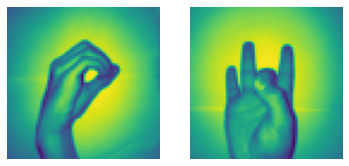

In [6]:
# Show a sample of the images
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x[210].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x[1110].reshape(img_size,img_size))
plt.axis('off')


In [7]:
# As you can see, y (labels) are already one hot encoded
print(f"y-max is: {y.max()}")
print(f"y-min is: {y.min()}")
print(f"y shape is: {y.shape} \n")

# And x (features) are already scaled between 0 and 1
print(f"x-max is: {x.max()}")
print(f"x-min is: {x.min()}")
print(f"x shape is: {x.shape}")

y-max is: 1.0
y-min is: 0.0
y shape is: (2062, 10) 

x-max is: 1.0
x-min is: 0.003921568859368563
x shape is: (2062, 64, 64)


In [8]:
# Create x_train, y_train, x_test, y_test arrays

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
#print x_train and y_train shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 64, 64, 1)
(1649, 10)
(413, 64, 64, 1)
(413, 10)


In [9]:
# Build the model
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


# fully connected
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [10]:
# model.build(64,64,1) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [12]:
# Compile model
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [13]:
# Fit the model
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
52/52 [==============================] - 46s 33ms/step - loss: 2.3299 - accuracy: 0.0893 - val_loss: 2.3038 - val_accuracy: 0.0775
Epoch 2/100
52/52 [==============================] - 1s 10ms/step - loss: 2.3024 - accuracy: 0.0966 - val_loss: 2.3040 - val_accuracy: 0.0896
Epoch 3/100
52/52 [==============================] - 1s 10ms/step - loss: 2.3023 - accuracy: 0.1100 - val_loss: 2.3039 - val_accuracy: 0.0775
Epoch 4/100
52/52 [==============================] - 1s 10ms/step - loss: 2.2991 - accuracy: 0.1293 - val_loss: 2.2492 - val_accuracy: 0.1792
Epoch 5/100
52/52 [==============================] - 1s 10ms/step - loss: 1.8688 - accuracy: 0.3642 - val_loss: 0.9954 - val_accuracy: 0.7022
Epoch 6/100
52/52 [==============================] - 0s 10ms/step - loss: 0.9894 - accuracy: 0.6588 - val_loss: 0.6069 - val_accuracy: 0.7772
Epoch 7/100
52/52 [==============================] - 1s 10ms/step - loss: 0.7564 - accuracy: 0.7287 - val_loss: 0.5013 - val_accuracy: 0.8571
Epoch

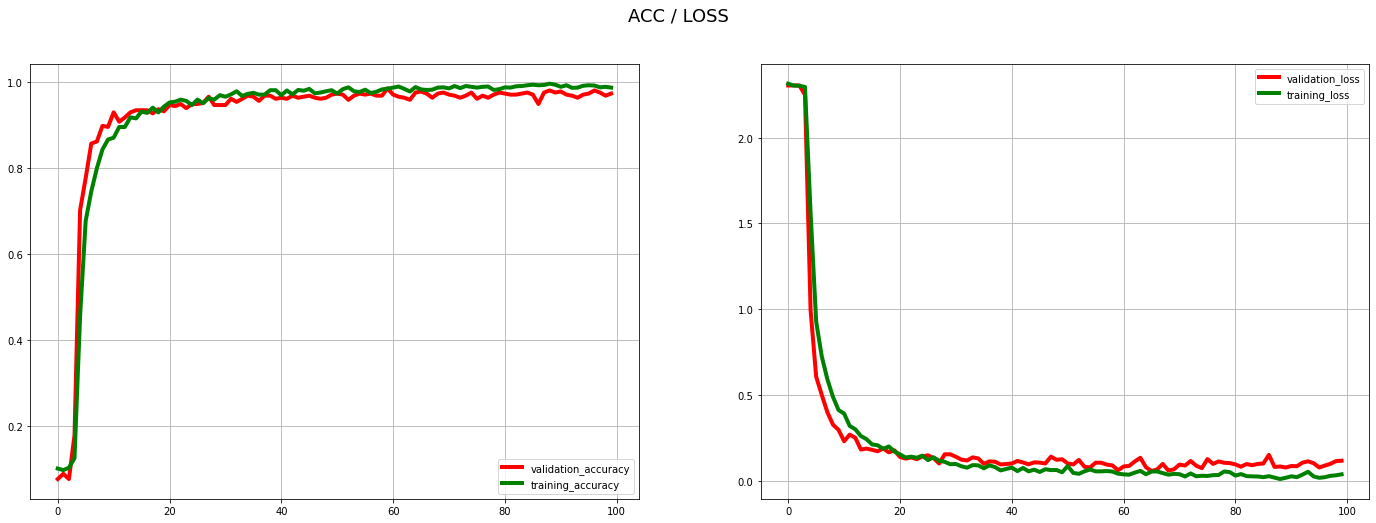

In [14]:
# Evaluate Model
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

In [15]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.9872649908065796


In [16]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.0381438210606575


In [17]:
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])

Validation accuracy of the model:  0.9733656048774719


In [18]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.11741754412651062


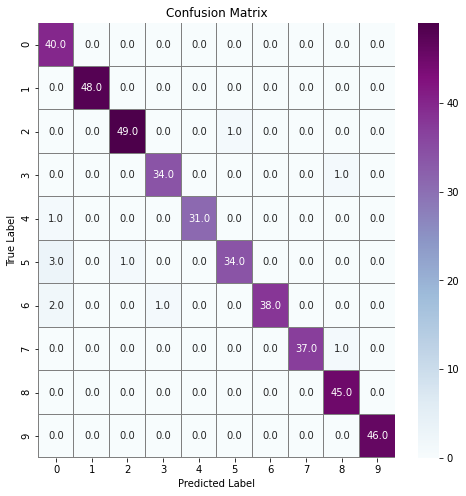

In [19]:
# confusion matrix

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Part 2 - Alphabet ASL hand signals (A-Z, excluding J and Z which are movement based)

In [20]:
# Import Data (data already split into train and test datasets): 
filepath = Path("./input/sign_mnist_train.csv")
alpha_train_df = pd.read_csv(filepath)

filepath = Path("./input/sign_mnist_test.csv")
alpha_test_df = pd.read_csv(filepath)

In [21]:
# In this dataset (similar to the MNist dataset):
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
# Label is the designation of which alphabet letter the image relates to.
# Pixel0 to Pixel783: These are the pixel values of the image metrics. That is each row contains 28 * 28 = 784 (0-783 here) values here.
# Each one of these values indicates the pixel value at i x 28 + j th pixel position in the image metric.

In [22]:
alpha_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [23]:
alpha_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [24]:
# Assign X & y for train dataset
X_alpha_train = alpha_train_df.drop(columns='label')
X_alpha_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [25]:
# convert to X & y values
X_alpha_train = alpha_train_df.drop(columns='label').values
y_alpha_train = alpha_train_df['label'].values

In [26]:
X_alpha_train.shape

(27455, 784)

In [27]:
X_alpha_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [28]:
y_alpha_train.shape

(27455,)

In [29]:
# Assign X & y for test dataset
X_alpha_test = alpha_test_df.drop(columns='label')
X_alpha_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,166,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,210,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,205,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [30]:
# Normalize Testing Pixel Values
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
# For most image data, the pixel values are integers with values between 0 and 255.
# To assist the Neural network,normalize the pixel values so that each pixel value has a value between 0 and 1.
# This can be achieved by dividing all pixels values by the largest pixel value; that is 255. 
# This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

X_alpha_test = X_alpha_test/255

In [31]:
X_alpha_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.584314,0.584314,0.588235,0.588235,0.588235,0.592157,0.592157,0.588235,0.592157,0.596078,0.596078,0.596078,0.596078,0.596078,0.600000,0.600000,0.592157,0.596078,0.596078,0.600000,0.596078,0.596078,0.592157,0.592157,0.588235,0.588235,0.588235,0.584314,0.588235,0.588235,0.588235,0.596078,0.596078,0.592157,0.596078,0.596078,0.596078,0.596078,0.596078,0.600000,...,0.513725,0.525490,0.564706,0.576471,0.490196,0.341176,0.341176,0.403922,0.419608,0.431373,0.454902,0.443137,0.294118,0.290196,0.290196,0.290196,0.298039,0.290196,0.321569,0.525490,0.658824,0.607843,0.572549,0.537255,0.568627,0.572549,0.584314,0.529412,0.486275,0.490196,0.541176,0.580392,0.498039,0.349020,0.321569,0.376471,0.415686,0.439216,0.470588,0.419608
1,0.494118,0.501961,0.513725,0.517647,0.521569,0.525490,0.529412,0.529412,0.533333,0.541176,0.537255,0.537255,0.541176,0.541176,0.545098,0.537255,0.556863,0.549020,0.541176,0.545098,0.537255,0.537255,0.533333,0.529412,0.525490,0.521569,0.525490,0.517647,0.505882,0.517647,0.525490,0.529412,0.529412,0.537255,0.545098,0.545098,0.545098,0.549020,0.552941,0.552941,...,0.447059,0.439216,0.349020,0.188235,0.521569,0.760784,0.713725,0.725490,0.721569,0.721569,0.713725,0.709804,0.674510,0.682353,0.694118,0.698039,0.698039,0.701961,0.709804,0.717647,0.733333,0.686275,0.647059,0.603922,0.462745,0.419608,0.392157,0.294118,0.376471,0.325490,0.184314,0.407843,0.760784,0.717647,0.729412,0.721569,0.721569,0.721569,0.713725,0.705882
2,0.333333,0.345098,0.360784,0.376471,0.411765,0.482353,0.529412,0.560784,0.576471,0.596078,0.615686,0.639216,0.658824,0.670588,0.713725,0.674510,0.686275,0.725490,0.717647,0.721569,0.725490,0.725490,0.725490,0.717647,0.717647,0.713725,0.709804,0.698039,0.337255,0.345098,0.364706,0.376471,0.423529,0.490196,0.537255,0.568627,0.584314,0.603922,0.627451,0.650980,...,0.568627,0.482353,0.305882,0.635294,0.937255,0.890196,0.898039,0.886275,0.886275,0.882353,0.878431,0.870588,0.349020,0.356863,0.368627,0.435294,0.533333,0.603922,0.654902,0.721569,0.490196,0.011765,0.650980,0.882353,0.764706,0.737255,0.674510,0.725490,0.631373,0.478431,0.266667,0.650980,0.949020,0.890196,0.901961,0.890196,0.886275,0.882353,0.878431,0.870588
3,0.796078,0.803922,0.811765,0.807843,0.811765,0.819608,0.823529,0.819608,0.823529,0.819608,0.815686,0.811765,0.811765,0.819608,0.815686,0.823529,0.823529,0.811765,0.819608,0.819608,0.815686,0.819608,0.823529,0.819608,0.811765,0.815686,0.819608,0.811765,0.807843,0.815686,0.819608,0.815686,0.815686,0.823529,0.827451,0.823529,0.827451,0.819608,0.819608,0.823529,...,0.333333,0.313725,0.329412,0.592157,0.933333,1.000000,1.000000,0.980392,0.929412,0.960784,0.980392,0.909804,0.403922,0.396078,0.400000,0.403922,0.372549,0.815686,0.905882,0.890196,0.819608,0.745098,0.701961,0.713725,0.596078,0.588235,0.623529,0.466667,0.325490,0.247059,0.603922,0.972549,0.968627,0.972549,0.992157,0.925490,0.901961,0.941176,0.992157,1.000000
4,0.737255,0.749020,0.756863,0.764706,0.780392,0.788235,0.792157,0.796078,0.796078,0.796078,0.800000,0.800000,0.800000,0.796078,0.792157,0.776471,0.847059,0.850980,0.529412,0.709804,0.784314,0.764706,0.760784,0.756863,0.745098,0.741176,0.733333,0.725490,0.745098,0.760784,0.768627,0.772549,0.784314,0.792157,0.800000,0.807843,0.811765,0.811765,0.807843,0.803922,...,0.364706,0.203922,0.094118,0.207843,0.247059,0.129412,

In [32]:
# convert to X & y values
X_alpha_test = alpha_test_df.drop(columns='label').values

In [33]:
y_alpha_test = alpha_test_df['label'].values

In [34]:
X_alpha_test.shape

(7172, 784)

In [35]:
y_alpha_test.shape

(7172,)

In [36]:
X_alpha_train = X_alpha_train.reshape(-1,28,28,1)
X_alpha_test = X_alpha_test.reshape(-1,28,28,1)
#print x_train and y_train shape
print(X_alpha_train.shape)
print(y_alpha_train.shape)
print(X_alpha_test.shape)
print(y_alpha_test.shape)


(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


In [37]:
# Encoding Target Values
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
y_alpha_train=to_categorical(y_alpha_train)
y_alpha_test=to_categorical(y_alpha_test)

In [38]:
print(X_alpha_train.shape)
print(y_alpha_train.shape)
print(X_alpha_test.shape)
print(y_alpha_test.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


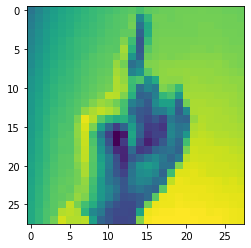

In [39]:
# show some sample letters
plt.imshow(X_alpha_train[0][:,:,0])

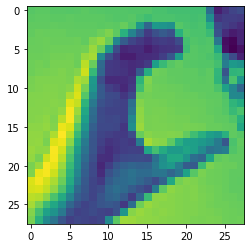

In [40]:
plt.imshow(X_alpha_train[2][:,:,0])

In [41]:
# Adjust model for amended input size (28 x 28, rather than 64 x 64 previously)
# Build the model - using original model didn't work.  Trying different model:
# source: https://www.kaggle.com/shahules/indian-way-to-learn-cnn

model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(BatchNormalization(momentum=.15))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(BatchNormalization(momentum=0.15))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(BatchNormalization(momentum=.15))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.4))
model2.add(Dense(25, activation = "softmax"))

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

In [43]:
# Compile model
# The below 2 lines of original code didn't work.  
#optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
#model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

# Had to amend to this:
model2.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [44]:
# Perform Data augmentation on alphabet set, to increase the training dataset for the model (like the parrot images)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_alpha_train)

In [45]:
# Fit the model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs=30 #change this to 30 if you need to get better score
batch_size=64

history = model2.fit_generator(datagen.flow(X_alpha_train,y_alpha_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_alpha_test,y_alpha_test),
                              verbose = 2, steps_per_epoch=X_alpha_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
428/428 - 18s - loss: 1.7173 - accuracy: 0.4662 - val_loss: 0.2679 - val_accuracy: 0.8996
Epoch 2/30
428/428 - 12s - loss: 0.3554 - accuracy: 0.8784 - val_loss: 0.0715 - val_accuracy: 0.9791
Epoch 3/30
428/428 - 12s - loss: 0.1515 - accuracy: 0.9502 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 4/30
428/428 - 12s - loss: 0.1074 - accuracy: 0.9646 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/30
428/428 - 12s - loss: 0.0793 - accuracy: 0.9735 - val_loss: 0.0104 - val_accuracy: 0.9962
Epoch 6/30
428/428 - 12s - loss: 0.0614 - accuracy: 0.9797 - val_loss: 5.4739e-04 - val_accuracy: 1.0000
Epoch 7/30
428/428 - 12s - loss: 0.0541 - accuracy: 0.9821 - val_loss: 0.0059 - val_accuracy: 0.9976
Epoch 8/30
428/428 - 12s - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.0073 - val_accuracy: 0.9961
Epoch 9/30
428/428 - 12s - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 10/30
428/428 - 12s - loss: 0.0421 - accuracy: 0.9869 - val_loss: 2.6753e-04 - va

# Part 3 - Create combined dataset and NN model to recognise both numbers & alphabet ASL hand signals

In [46]:
# resizing the alphabet images (28x28, csv file) to match the digits images (64x64, numpy array)
import pylab as pl
from PIL import Image
import csv
#matrix = np.array(list(csv.reader(open('./input/Sign-language-alpha-dataset/sign_mnist_train.csv', "r"), delimiter=","))).astype("uint8")  #read csv
#matrix = np.array(alpha_train_df)

# function to resize images - takes an image in an Numpy array of any size, and resizes it to the desired dimension. 
# This package, rather than leaving the additional blanks, it attempts to look at near pixel to fill in the blank pixels.
def image_resize(test_image):
    imgObj = Image.fromarray(np.uint8(test_image) , 'L')  #convert numpy matrix to Image object
    resized_imgObj = imgObj.resize((64,64))  #resize Image object to specified dimensions
    resized_matrix = np.asarray(resized_imgObj)  #convert Image object back to numpy matrix
    return resized_matrix

In [47]:
# Loop to run through all our Training set images (which have already been converted to a numpy array)

X_alpha_train_resized = np.zeros((27455, 64, 64, 1))  # creates numpy array filled with zeros
for idx in range (X_alpha_train.shape[0]):
    test_image = np.squeeze(X_alpha_train[idx], axis=2)
    resized_image = image_resize(test_image)
    X_alpha_train_resized[idx,:,:,0] = resized_image

In [48]:
# Concateonate the X_train_resized with the X_train digits data
X_total_train_resized = np.concatenate((X_alpha_train_resized, x_train), axis=0)

In [49]:
X_total_train_resized.shape

(29104, 64, 64, 1)

In [50]:
# This is to almagamate the Training digit and Training alphbet images into one dataframe, diagonally.
from scipy.linalg import block_diag
y_total_train = block_diag(y_alpha_train,y_train)

In [51]:
# Loop to run through all our Testing set images (which have already been converted to a numpy array)

X_alpha_test_resized = np.zeros((7172, 64, 64, 1))  # creates numpy array filled with zeros
for idx in range (X_alpha_test.shape[0]):
    test_image = np.squeeze(X_alpha_test[idx], axis=2)
    resized_image = image_resize(test_image)
    X_alpha_test_resized[idx,:,:,0] = resized_image

In [52]:
# Concateonate the X_test_resized with the X_test digits data
X_total_test_resized = np.concatenate((X_alpha_test_resized, x_test), axis=0)

In [53]:
X_total_test_resized.shape

(7585, 64, 64, 1)

In [54]:
# This is to almagamate the Testing digit and Testing alphbet images into one dataframe, diagonally.
y_total_test = block_diag(y_alpha_test,y_test)

In [55]:
# Running on Model 1 architecture - but increasing final layers, reducing drop out from 25% to 20%.

model3 = Sequential()

model3.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Dropout(0.20))

model3.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Dropout(0.20))

model3.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Dropout(0.20))

model3.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Dropout(0.20))


# fully connected
model3.add(Flatten())

model3.add(Dense(256, activation = 'relu'))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(35, activation = 'softmax'))

In [56]:
# Compile model
model3.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [57]:
# Fit the model - on our combined dataset
# the higher the batch size, the more accurate, but also takes up more memory (esp as we are running images)
history = model3.fit(X_total_train_resized,y_total_train,epochs=150, batch_size=128, validation_data=(X_total_test_resized,y_total_test))

Epoch 1/150
228/228 [==============================] - 7s 22ms/step - loss: 5.9284 - accuracy: 0.0593 - val_loss: 1.9037 - val_accuracy: 0.4351
Epoch 2/150
228/228 [==============================] - 4s 19ms/step - loss: 1.4621 - accuracy: 0.5170 - val_loss: 0.5943 - val_accuracy: 0.8315
Epoch 3/150
228/228 [==============================] - 5s 20ms/step - loss: 0.5613 - accuracy: 0.7976 - val_loss: 0.4091 - val_accuracy: 0.8538
Epoch 4/150
228/228 [==============================] - 4s 19ms/step - loss: 0.3485 - accuracy: 0.8723 - val_loss: 0.3149 - val_accuracy: 0.8912
Epoch 5/150
228/228 [==============================] - 4s 19ms/step - loss: 0.2637 - accuracy: 0.9010 - val_loss: 0.2773 - val_accuracy: 0.9015
Epoch 6/150
228/228 [==============================] - 4s 19ms/step - loss: 0.2134 - accuracy: 0.9236 - val_loss: 0.2531 - val_accuracy: 0.9197
Epoch 7/150
228/228 [==============================] - 4s 19ms/step - loss: 0.1913 - accuracy: 0.9323 - val_loss: 0.2494 - val_accuracy:

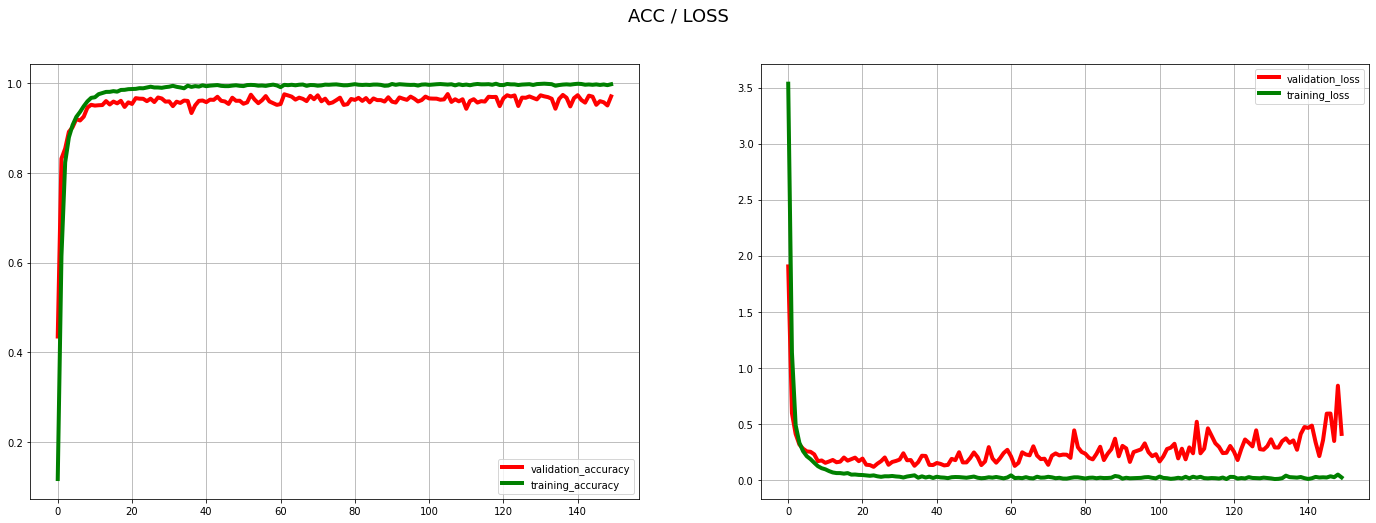

In [58]:
# Evaluate Model
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

In [59]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])

Train accuracy of the model:  0.9971824884414673
Train loss of the model:  0.020692387595772743
Validation accuracy of the model:  0.9702043533325195
Validation loss of the model:  0.4088292121887207


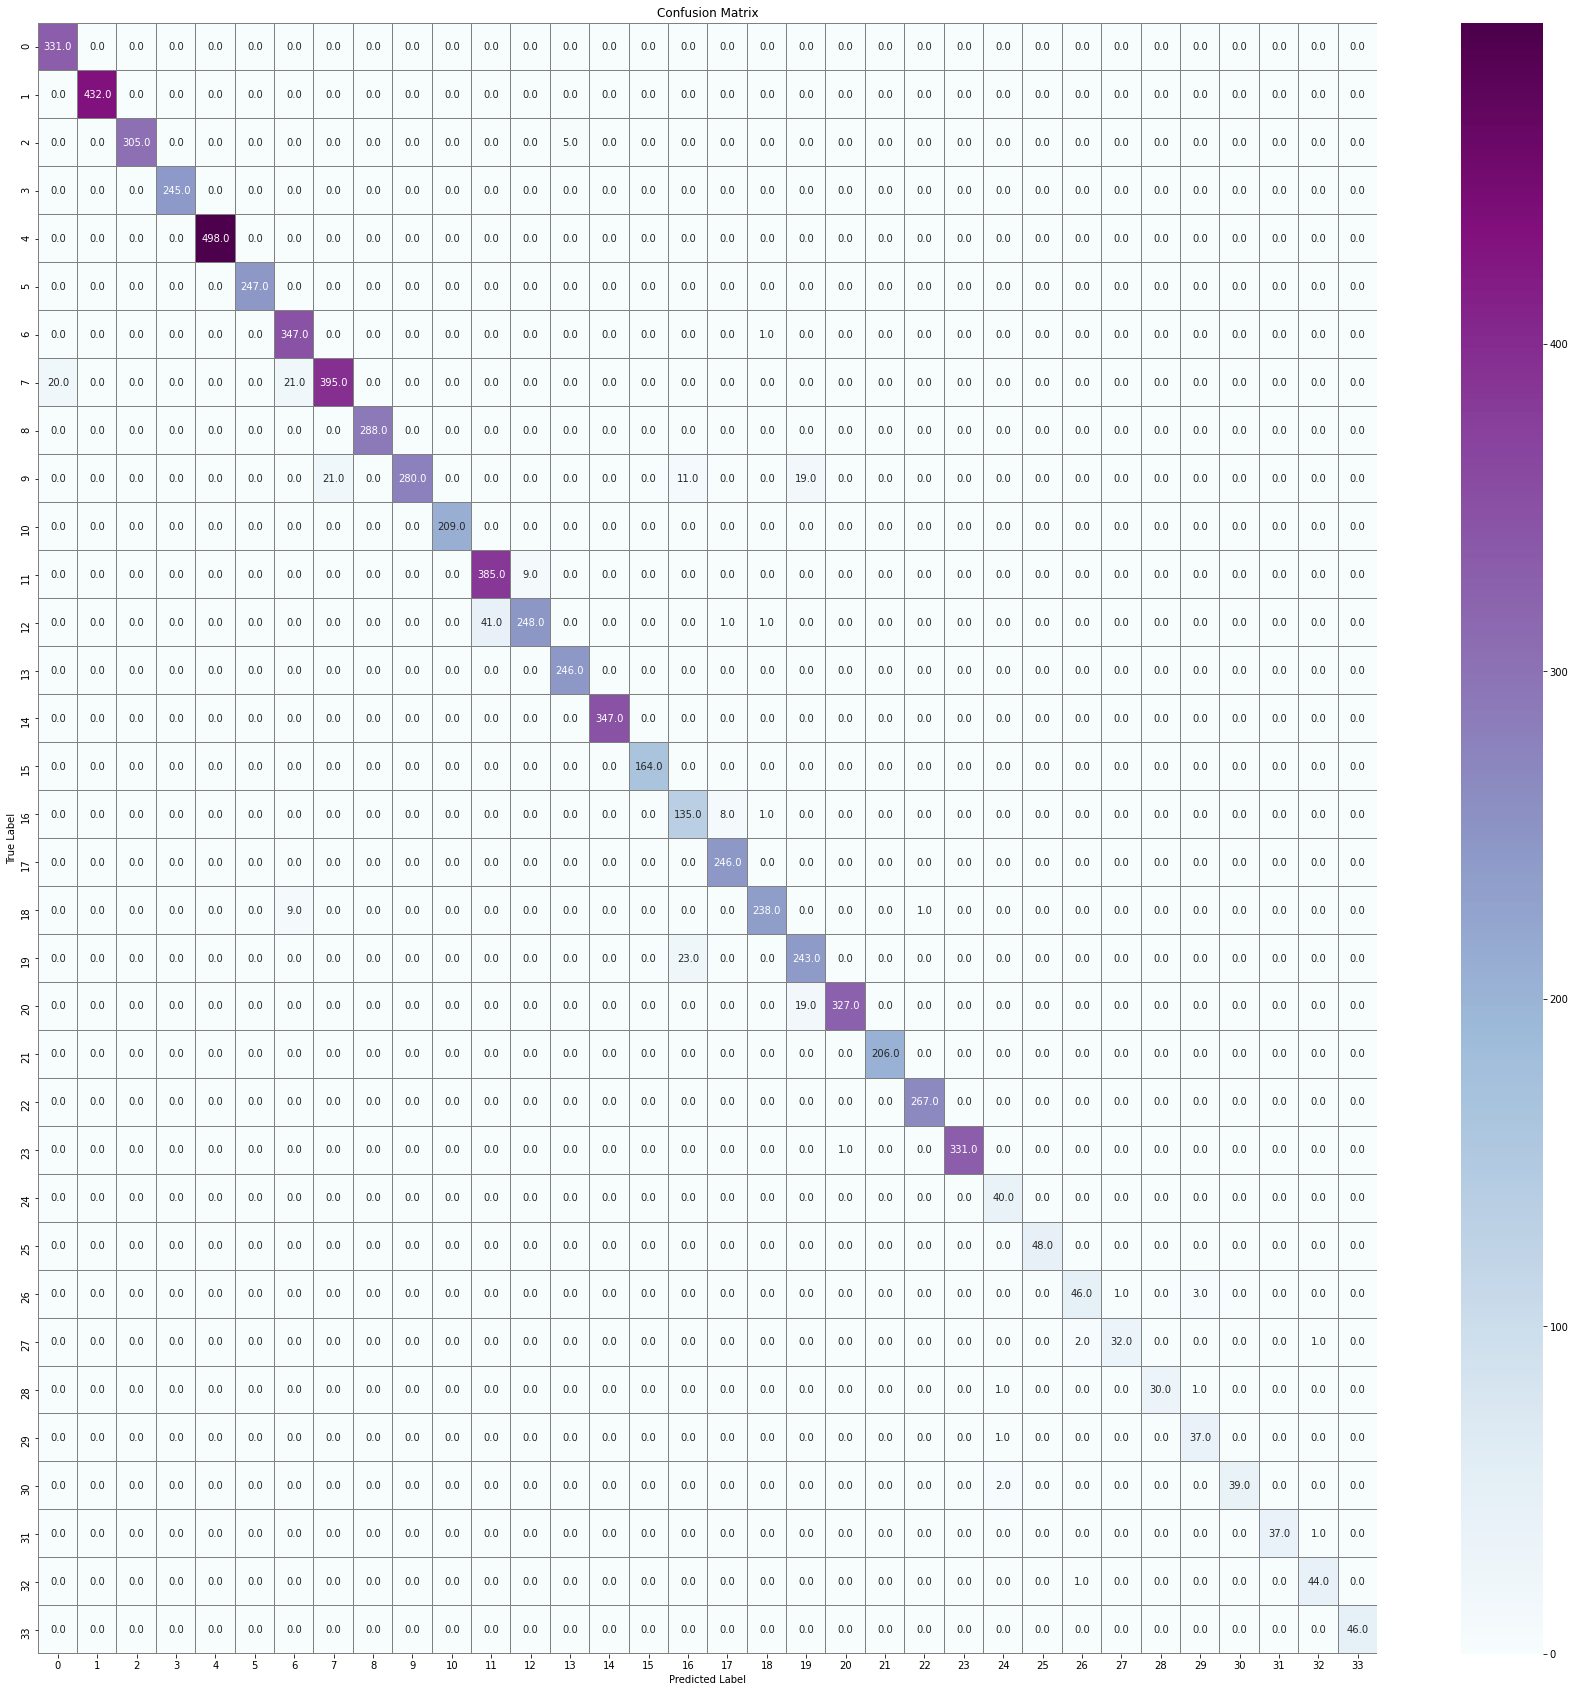

In [60]:
# confusion matrix

# Predict the values from the validation dataset
Y_pred = model3.predict(X_total_test_resized)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_total_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Part 4 - Feed model new pictures with different hand shapes

In [61]:
# Test code to load and show an image with Pillow, then predict with digit model

# Picture A = Cartoon Hand
from PIL import Image
# Open the image form working directory
image = Image.open('./input/New_Pictures/cartoonhand.png').convert('L')
resized_imgObj = image.resize((64,64))  #resize Image object
resized_matrix = np.asarray(resized_imgObj)  #convert Image object to matrix
cartoon_pic = np.expand_dims(resized_matrix,2)
cartoon_picture = np.expand_dims(cartoon_pic,0)
print(cartoon_picture.shape)

(1, 64, 64, 1)


In [62]:
# digit model order of numbers in array = 9,0,7,6,1,8,4,3,2,5

In [63]:
# digit model order of numbers in array = 9,0,7,6,1,8,4,3,2,5
model.predict(cartoon_picture)

array([[1.9846722e-18, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [64]:
# Pretty function
def hand_read_new(picture):
    image = Image.open(picture).convert('L') #opens image and converts to greyscale
    resized_imgObj = image.resize((64,64))  #resize Image object
    resized_matrix = np.asarray(resized_imgObj)  #convert Image object to matrix
    new_test_picture = np.expand_dims(resized_matrix,2)
    new_test_picture = np.expand_dims(new_test_picture,0)
    pred = model3.predict(new_test_picture)[0]
    pred[pred==max(pred)] = 1
    pred[pred<max(pred)] = 0
    display(image)
    #     #Letters A-Y (missing J and Z because movement is required) 
    if np.all(pred == np.array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an A!")
    elif np.all(pred == np.array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a B!")
    elif np.all(pred == np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a C!")
    elif np.all(pred == np.array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a D!")
    elif np.all(pred == np.array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an E!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an F!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a G!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an H!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an I!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a K!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an L!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an M!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an N!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an O!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a P!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a Q!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
         print ("its an R!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an S!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a T!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a U!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a V!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a W!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its an X!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a Y!")
                #     #Numbers 0-9
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a Zero!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])):
        print ("its a One!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])):
        print ("its a Two!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])):
        print ("its a Three!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])):
        print ("its a Four!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])):
        print ("its a Five!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])):
        print ("its a Six!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a Seven!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])):
        print ("its an Eight!")
    elif np.all(pred == np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])):
        print ("its a Nine!")
    else:
        print("I don't know what this is!")

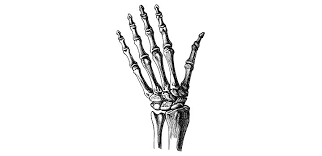

its a V!


In [66]:
hand_read_new('./input/New_Pictures/skeletonhandimages.png')

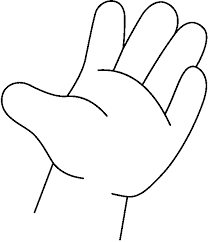

its an A!


In [67]:
hand_read_new('./input/New_Pictures/cartoonhand.png')

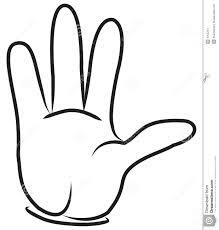

its an F!


In [68]:
hand_read_new('./input/New_Pictures/fourfingeredhand.jpg')

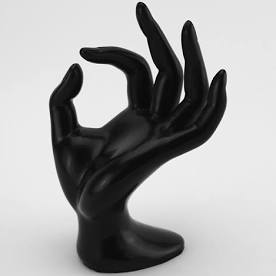

its a C!


In [69]:
hand_read_new('./input/New_Pictures/mannequinhand.jpg')

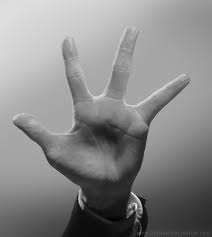

its a Q!


In [70]:
hand_read_new('./input/New_Pictures/realitysimpsonhand.jpg')

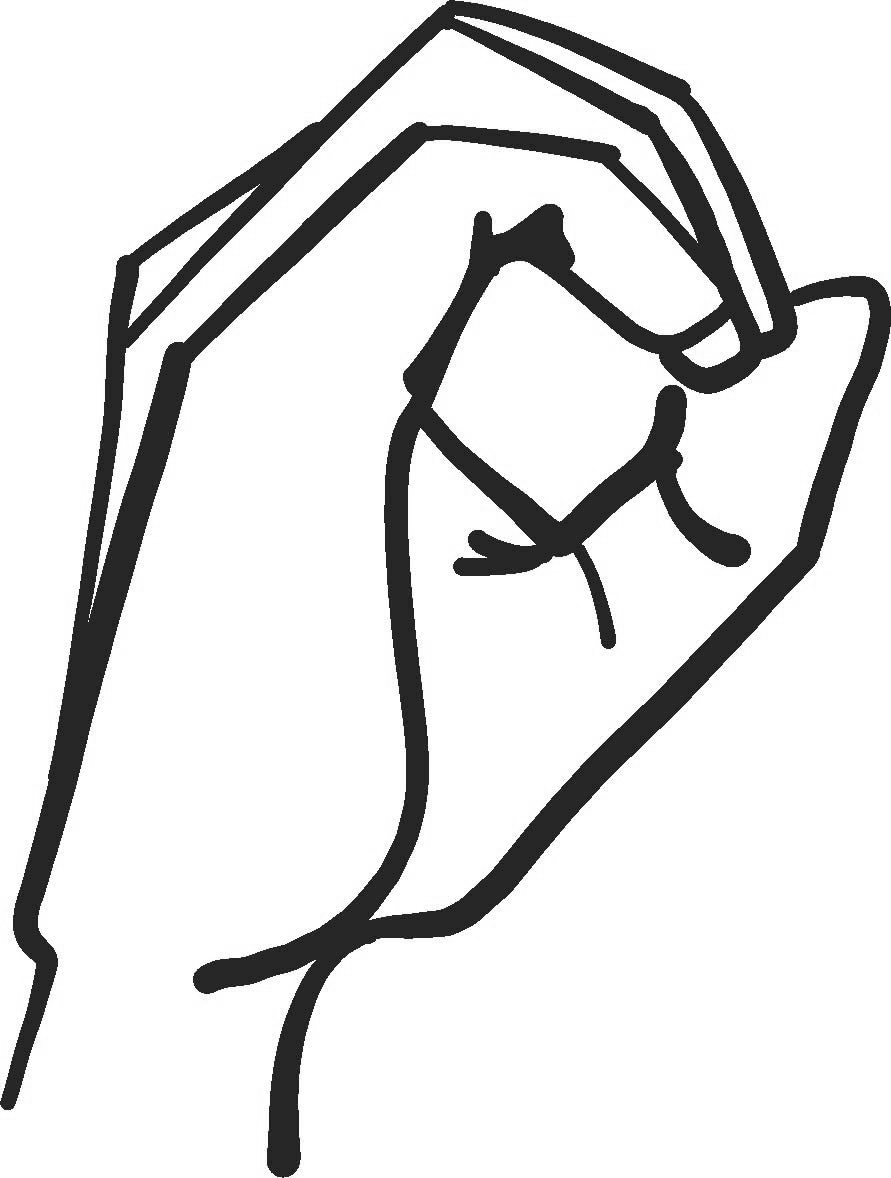

its an O!


In [71]:
hand_read_new('./input/New_Pictures/handO.jpg')